## Многомерный статистический анализ

### ЛР № 4 . Дисперсионный анализ (ANOVA)

In [3]:
import numpy as np
import string
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sps
from sklearn.metrics import roc_curve, roc_auc_score
%matplotlib inline
%matplotlib inline

**1. Сформировать функцию пользователя для вычисления статистики ANOVA**

In [5]:
def ANOVA(X):
    """ Вычисление статистики ANOVA
    Параметры: X - выборка СВ
    Возвращает: g - статистика g
    """
    n = len(X)
    k = len(X[0])
    mx = 1 / n * np.sum(X, axis=0)
    x_avg = 1 / (n*k) * np.sum(X)
    
    Q1 = n * np.sum((x_avg - mx)**2)
    Q2 = np.sum((X - mx)**2)

    g = (k*(n-1)*Q1) / ((k-1)*Q2)
    return g

**2. Решение задачи дисперсионного анализа**

***2.1. Сформировать выборки***

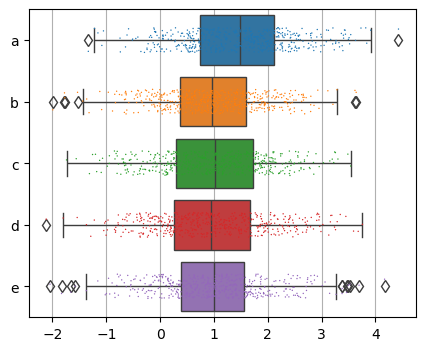

In [8]:
# Параметры СВ:
n = 500 # длина выборок СВ
m = 5 # число выборок
mx = 1 # МО СВ X
dmx = 0.5 # дельта МО для 0 выборки
sx = 1 # СКО СВ X
# Генерирование и визуализация данных:
np.random.seed(0)
X = np.random.normal(mx, sx, (n, m))
X[:,0] += dmx
df = pd.DataFrame(X, columns=list(string.ascii_letters[:m]))
f, ax = plt.subplots(figsize=(5, 4))
# Plot the orbital period with horizontal boxes
sns.boxplot(df, orient='h', flierprops={"marker": "d"})
# Add in points to show each observation
sns.stripplot(df, orient='h', size=1, jitter=0.2)
# Tweak the visual presentation
ax.xaxis.grid(True)
plt.show()

***2.2. Проверить нормальность выборок***

In [10]:
a = 0.05 # уровень значимости
# Использование статистики Шапиро-Уилка:
for col in df.columns:
    stat, p = sps.shapiro(df[col])
    if p > a:
        print(f"Группа {col}: гипотеза нормальности принимается")
    else:
        print(f"Группа {col}: гипотеза нормальности отвергается")

Группа a: гипотеза нормальности принимается
Группа b: гипотеза нормальности принимается
Группа c: гипотеза нормальности принимается
Группа d: гипотеза нормальности принимается
Группа e: гипотеза нормальности принимается


***2.3. Проверить однородность дисперсий***

In [12]:
a = 0.05 # уровень значимости
# Использование теста Левена:
stat, p = sps.levene(*[df[col] for col in df.columns])
if p > a:
    print("Гипотеза однородности принимается")
else:
    print("Гипотеза однородности отвергается")

Гипотеза однородности отвергается


***2.4. Проверить равенство смещений выборок***

In [14]:
a = 0.05 # уровень значимости
n = len(X)
k = len(X[0])
u = sps.f.ppf(1-a, k-1, k*(n-1))
g = ANOVA(X)
if g <= u:
    print("Гипотеза равенства смещений выборок принимается")
else:
    print("Гипотеза равенства смещений выборок отвергается")

Гипотеза равенства смещений выборок отвергается


***2.5. Выявить выборки с отличающимися смещениями***

In [16]:
# Использование теста Тьюки:
res = sps.tukey_hsd(*[df[col] for col in df.columns])
print(res)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.474     0.000     0.305     0.643
 (0 - 2)      0.456     0.000     0.287     0.624
 (0 - 3)      0.467     0.000     0.298     0.636
 (0 - 4)      0.455     0.000     0.287     0.624
 (1 - 0)     -0.474     0.000    -0.643    -0.305
 (1 - 2)     -0.018     0.998    -0.187     0.150
 (1 - 3)     -0.007     1.000    -0.176     0.162
 (1 - 4)     -0.019     0.998    -0.187     0.150
 (2 - 0)     -0.456     0.000    -0.624    -0.287
 (2 - 1)      0.018     0.998    -0.150     0.187
 (2 - 3)      0.012     1.000    -0.157     0.180
 (2 - 4)     -0.000     1.000    -0.169     0.168
 (3 - 0)     -0.467     0.000    -0.636    -0.298
 (3 - 1)      0.007     1.000    -0.162     0.176
 (3 - 2)     -0.012     1.000    -0.180     0.157
 (3 - 4)     -0.012     1.000    -0.180     0.157
 (4 - 0)     -0.455     0.000    -0.624    -0.287
 (4 - 1)      0.019     0.998   

**3. Статистическое исследование метода**

***3.1. Сформировать набор выборок***

In [19]:
# Параметры СВ:
n = 100    # длина выборок СВ
m = 5      # число выборок
mx = 1     # МО СВ X
dmx = 0.5  # дельта МО для нулевой выборки
sx = 1     # СКО СВ X
N = 10000  # количество экспериментов (наборов выборок)

g0 = np.zeros(N)  # инициализация массива знач. статистики g для H0
g1 = np.zeros(N)  # инициализация массива знач. статистики g для H1
for i in range(N):
    X = np.random.normal(mx, sx, (n, m))  # выборки с одинаковым смещением
    g0[i] = ANOVA(X)  # статистика для выборок с одинаковым смещением
    X[:,0] += dmx     # смещение нулевой выборки
    g1[i] = ANOVA(X)  # статистика для выборок с разным смещением

***3.2. Построить гистограмму статистик и теоретического распределения статистики при нулевой
гипотезе***

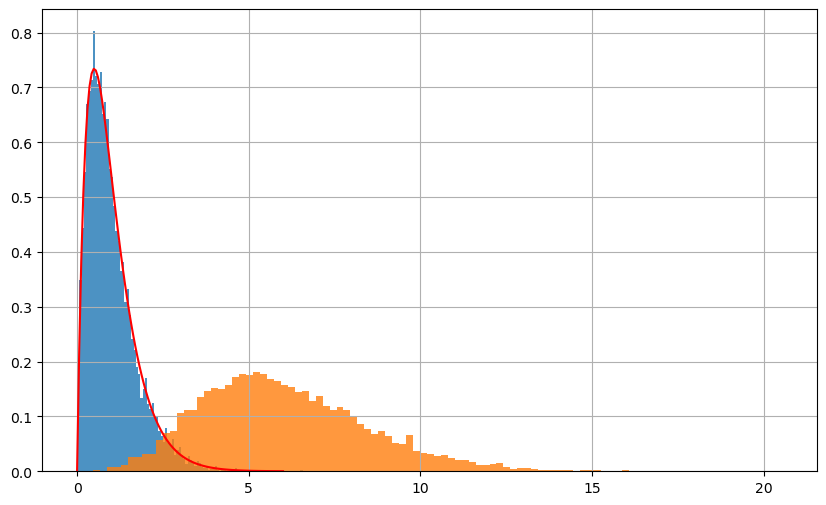

In [21]:
x = np.linspace(0, 6, 100) # массив аргументов
y = sps.f.pdf(x, m - 1, n * m - m) # массив значений плотности вероятности статистики
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.hist(g0, bins=100, density=1, alpha=0.8)
ax.hist(g1, bins=100, density=1, alpha=0.8)
ax.plot(x, y, c='r')
ax.grid()
plt.show()

***3.3. Построить ROC-кривую и вычислить AUC***

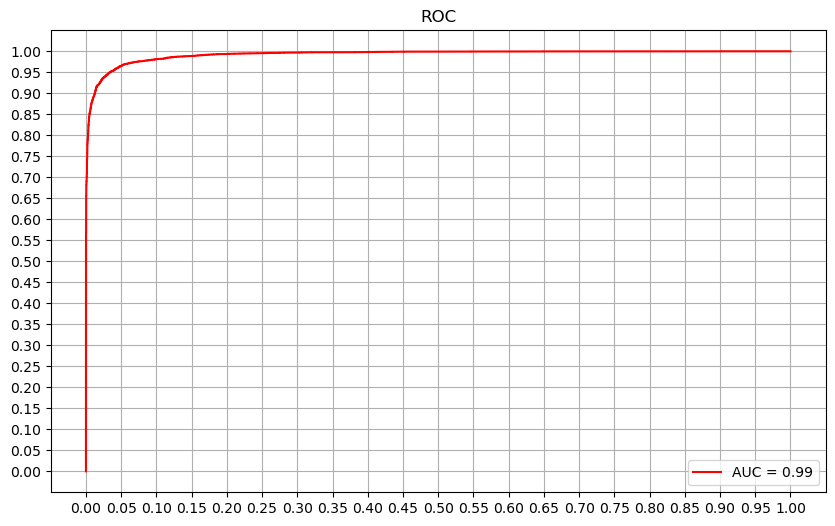

In [23]:
from sklearn.metrics import roc_curve, roc_auc_score
y = np.r_[np.zeros(N), np.ones(N)] # массив индексов истинных гипотез
T = np.r_[g0, g1] # объединенный массив значений статистики V
fpr, tpr, _ = roc_curve(y, T) # ROC-кривая
auc = roc_auc_score(y, T) # значение AU

# Визуализация ROC-кривой:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(fpr, tpr, 'r')
ax.grid()
ax.set_title("ROC")
ax.set_xticks(np.arange(0, 1.05, 0.05))
ax.set_yticks(np.arange(0, 1.05, 0.05))
ax.legend([f"AUC = {round(auc, 2)}"], loc="lower right");
plt.show()

***3.4. Построить зависимость AUC от величины дополнительного смещения dmx нулевой выборки. Значения
других параметров не изменять.***

In [25]:
auc_arr_dmx = []
dmx_arr = np.arange(0, 1.1, 0.1)
for dmx_i in dmx_arr:
    g0 = np.zeros(N)  # инициализация массива знач. статистики g для H0
    g1 = np.zeros(N)  # инициализация массива знач. статистики g для H1
    for i in range(N):
        X = np.random.normal(mx, sx, (n, m))  # выборки с одинаковым смещением
        g0[i] = ANOVA(X)  # статистика для выборок с одинаковым смещением
        X[:,0] += dmx_i     # смещение нулевой выборки
        g1[i] = ANOVA(X)  # статистика для выборок с разным смещением
    y = np.r_[np.zeros(N), np.ones(N)] # массив индексов истинных гипотез
    T = np.r_[g0, g1] # объединенный массив значений статистики V
    auc_arr_dmx.append(roc_auc_score(y, T)) # значение AU

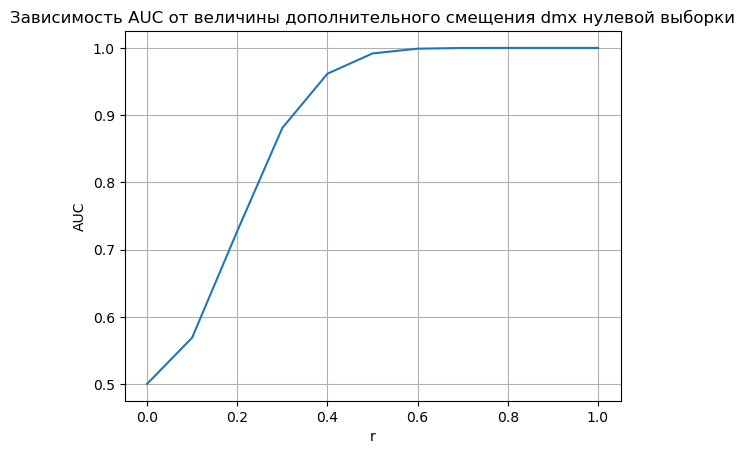

In [26]:
plt.plot(dmx_arr, auc_arr_dmx)
plt.grid()
plt.xlabel('r')
plt.ylabel('AUC')
plt.title('Зависимость AUC от величины дополнительного смещения dmx нулевой выборки')
plt.show()

***3.5. Построить зависимость AUC от величины СКО выборок sx. Значения других параметровне не изменять.***

In [28]:
auc_arr_sx = []
sx_arr = np.arange(1,20)
for sx_i in sx_arr:
    g0 = np.zeros(N)  # инициализация массива знач. статистики g для H0
    g1 = np.zeros(N)  # инициализация массива знач. статистики g для H1
    for i in range(N):
        X = np.random.normal(mx, sx_i, (n, m))  # выборки с одинаковым смещением
        g0[i] = ANOVA(X)  # статистика для выборок с одинаковым смещением
        X[:,0] += dmx     # смещение нулевой выборки
        g1[i] = ANOVA(X)  # статистика для выборок с разным смещением
    y = np.r_[np.zeros(N), np.ones(N)] # массив индексов истинных гипотез
    T = np.r_[g0, g1] # объединенный массив значений статистики V
    auc_arr_sx.append(roc_auc_score(y, T)) # значение AU

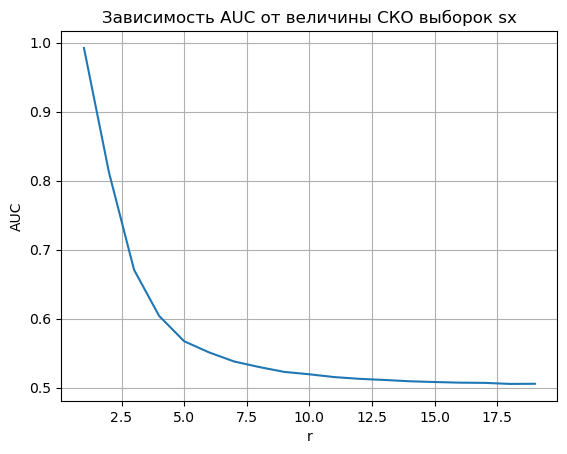

In [29]:
plt.plot(sx_arr, auc_arr_sx)
plt.grid()
plt.xlabel('r')
plt.ylabel('AUC')
plt.title('Зависимость AUC от величины СКО выборок sx')
plt.show()